In [1]:
def exist(col,cols):
    ok=False
    for i in cols:
        if (col==i):
            ok=True
    return(ok)
    

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.read_csv('loan-prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#general overview on the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [1]:
df.head(20)

NameError: name 'df' is not defined

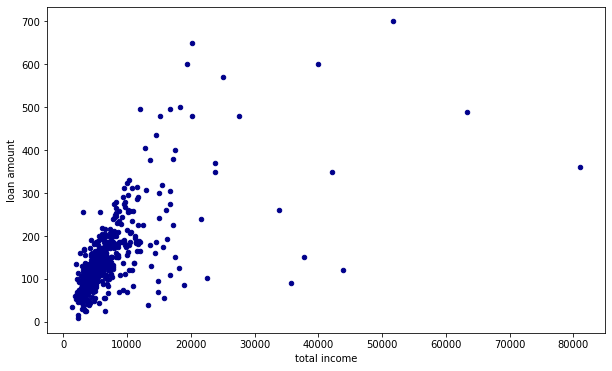

In [7]:
df.plot(kind='scatter', x='TotalIncome', y='LoanAmount', figsize=(10, 6), color='darkblue')
plt.xlabel('total income')
plt.ylabel('loan amount')
plt.show()


we observe that there s a stong postive relationshipbetween "the loan amount" and the total "income"

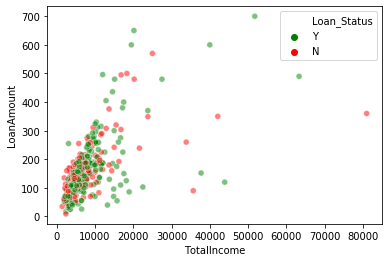

In [8]:
sns.scatterplot(data=df, x='TotalIncome', y='LoanAmount', hue='Loan_Status',palette=["green","red"],alpha=0.5)


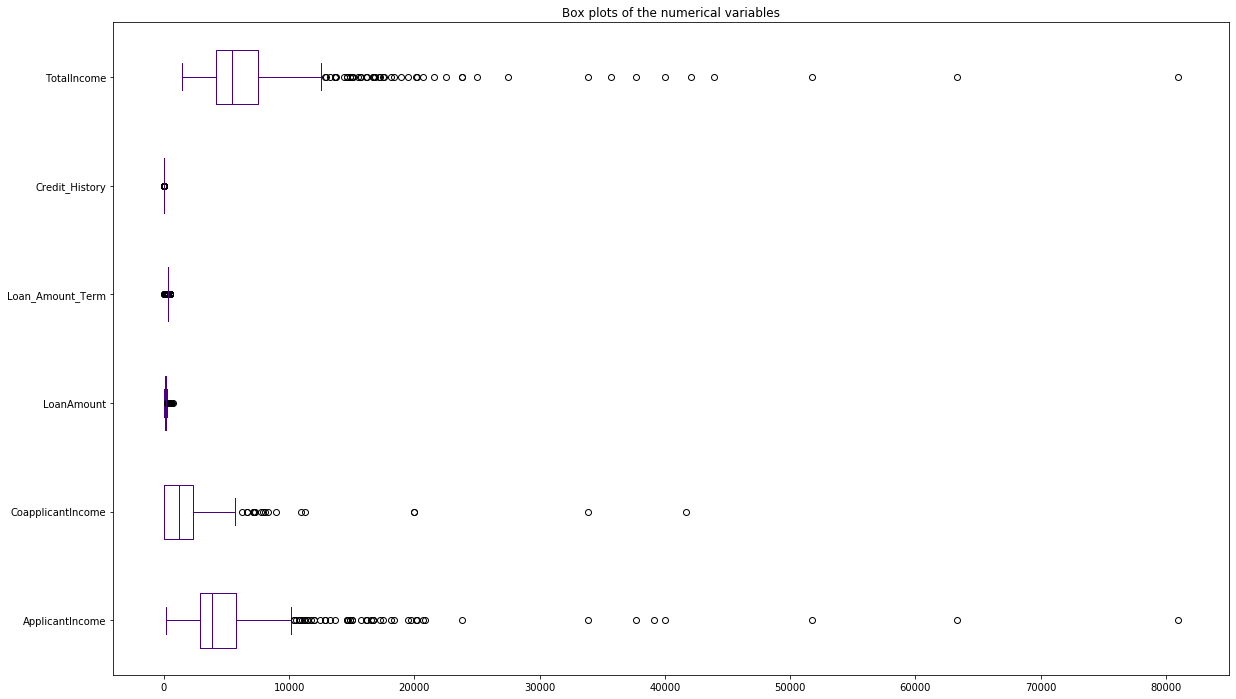

In [9]:
df.plot(kind='box', figsize=(20, 12), color='indigo', vert=False)
plt.title('Box plots of the numerical variables')
plt.show()

In [10]:
df_status = df.groupby(["Loan_Status"], axis=0).size()
df_status

Loan_Status
N    192
Y    422
dtype: int64

In [11]:
df_employ = df.groupby(['Self_Employed','Education',"Loan_Status"], axis=0).size()
df_employ 

Self_Employed  Education     Loan_Status
No             Graduate      N              113
                             Y              276
               Not Graduate  N               44
                             Y               67
Yes            Graduate      N               19
                             Y               46
               Not Graduate  N                7
                             Y               10
dtype: int64

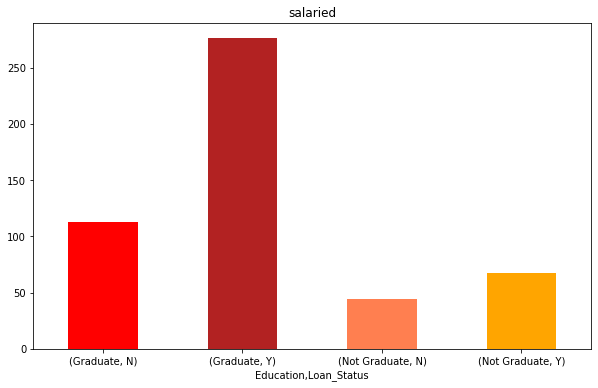

In [12]:
df_employ.loc["No"].plot(kind='bar', figsize=(10,6),rot=0,color=["red","firebrick","coral","orange"]) 
plt.title('salaried')
plt.show()

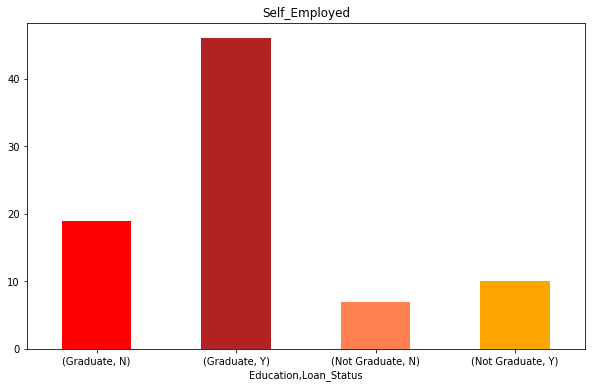

In [13]:
df_employ .loc["Yes"].plot(kind='bar', figsize=(10,6),rot=0,color=["red","firebrick","coral","orange"]) 
plt.title('Self_Employed')
plt.show()

In [14]:
df_area = df.groupby(['Property_Area',"Loan_Status"], axis=0).size()
df_area

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
dtype: int64

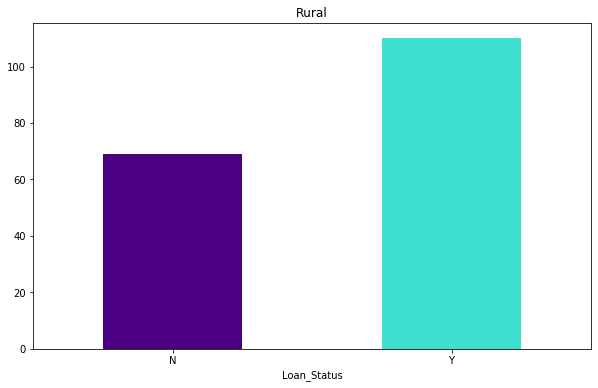

In [15]:
df_area.loc["Rural"].plot(kind='bar', figsize=(10,6), rot=0,color=["indigo","turquoise"]) 
plt.title("Rural")
plt.show()

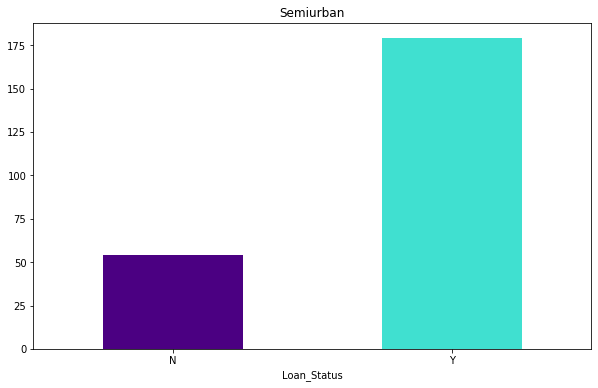

In [16]:
df_area.loc['Semiurban'].plot(kind='bar', figsize=(10,6), rot=0,color=["indigo","turquoise"]) 
plt.title('Semiurban')
plt.show()

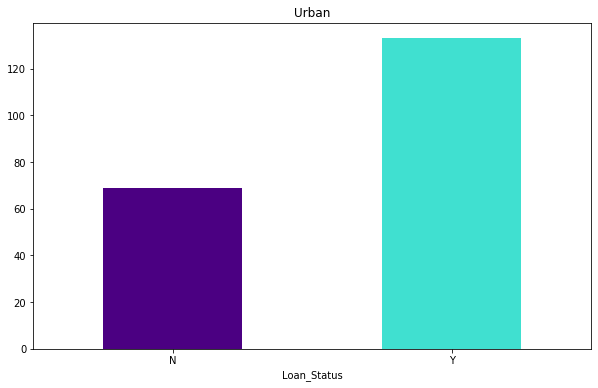

In [17]:
df_area.loc["Urban"].plot(kind='bar', figsize=(10,6), rot=0,color=["indigo","turquoise"]) 
plt.title('Urban')
plt.show()

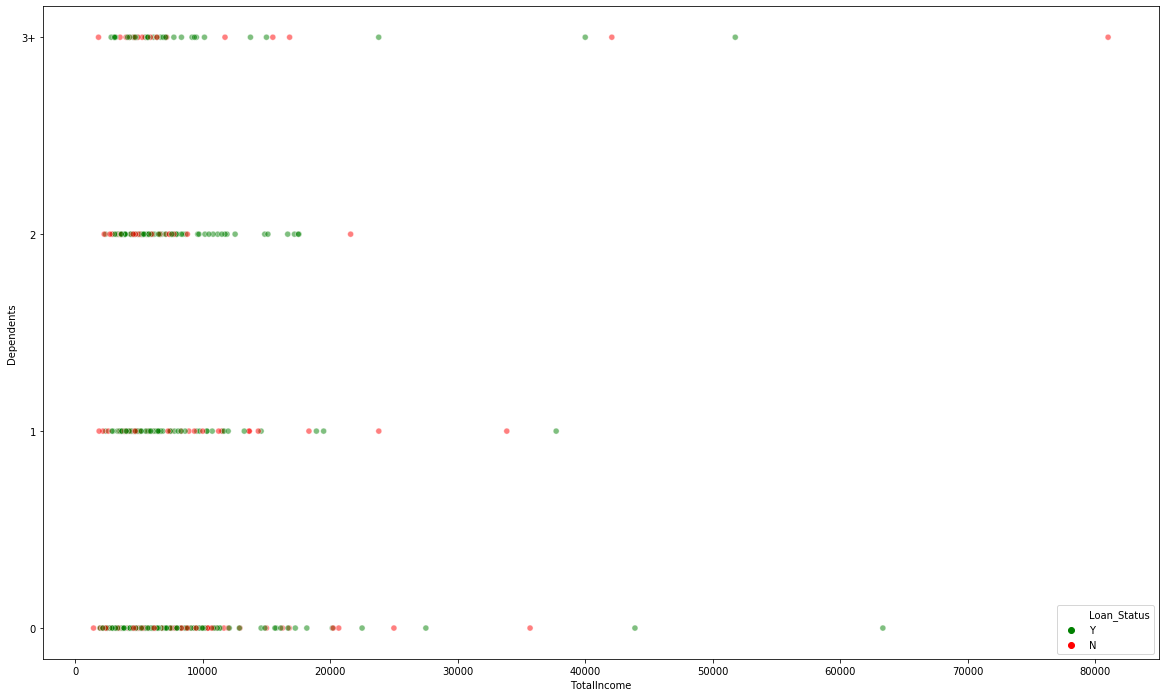

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
sns.scatterplot(data=df, x='TotalIncome', y="Dependents", hue='Loan_Status',palette=["green","red"],alpha=0.5,ax=ax)


In [19]:
np.unique(df.isnull().values)
#there is missing values

array([False,  True])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
TotalIncome          614 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [21]:
#filling missing values with the mean of the colomun if the feature is numerical
for col in df:
    if(df[col].dtype!="object"):
        aux=df[col].mean() 
        df[col].fillna(aux,inplace=True)


In [22]:
#checking if there s still missing values in  categorical variables
unique=np.unique(df.isnull().values)
print(unique)
#there s still missing categorical variables

[False  True]


In [23]:
categorical_missing=df.columns[df.isnull().any()]
#columns with the missing values(categorical)
categorical_missing


Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [24]:
#searching for categorical variables with none missing values to use label encoder
categorical_full=[]
for column in df:
    if((df[column].dtype=="object") and (exist(column,categorical_missing)== False)):
        categorical_full.append(column)

In [25]:
categorical_full_list=list(categorical_full)
index=categorical_full_list.index("Loan_ID")
categorical_full= np.delete(categorical_full, index)
#we are going to remove this colmun because it doesnt adds us any info it s just an ID 
print(categorical_full)

['Education' 'Property_Area' 'Loan_Status']


In [26]:
#we are going to encode the labels of the categorical variables with none missing values
for var in categorical_full:
    le_var = preprocessing.LabelEncoder()
    le_var.fit(np.unique(df[var].values))
    column=df.columns.get_loc(var)
    df[var] = le_var.transform(df[var])


In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,0,No,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,Male,No,0,0,No,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [28]:
# we are going to re add the "Loan_ID" column to the array that contains the categorical variables so that the machine doesnt use it in building the model later
categorical_full=np.append(categorical_full,"Loan_ID")

In [29]:
categorical_drop= np.concatenate((categorical_missing,"Loan_ID"), axis=None)
x=(df.drop(categorical_drop, axis=1)).values
print(categorical_full)

['Education' 'Property_Area' 'Loan_Status' 'Loan_ID']


In [33]:
x.shape

(5526,)

In [31]:
print(x)

[[0.000e+00 5.849e+03 0.000e+00 ... 2.000e+00 1.000e+00 5.849e+03]
 [0.000e+00 4.583e+03 1.508e+03 ... 0.000e+00 0.000e+00 6.091e+03]
 [0.000e+00 3.000e+03 0.000e+00 ... 2.000e+00 1.000e+00 3.000e+03]
 ...
 [0.000e+00 8.072e+03 2.400e+02 ... 2.000e+00 1.000e+00 8.312e+03]
 [0.000e+00 7.583e+03 0.000e+00 ... 2.000e+00 1.000e+00 7.583e+03]
 [0.000e+00 4.583e+03 0.000e+00 ... 1.000e+00 0.000e+00 4.583e+03]]


In [32]:
#we are going to build a KNN model to predict the missing categorical variables
for i in categorical_missing :
    y=df[i].values
    index_missing = np.where(y==np.nan)#searching for the index of the missing values for each variable
    for j in index_missing:
        y=np.delete(y,j)
        x=np.delete(x,j)
        #deleting the rows that contains missing values 
    x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))#Data Standardization 
    k=10 #setting the max neighbors used in the model
    acc_array=np.zeros(k)#an array used for storing the accuracies for each K
    for k in range(1,k+1):#searching for the best K
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#splitting the data into train and test
        classifier=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)#training the model
        y_pred=classifier.predict(x_test)#predecting for the test_set
        acc=metrics.accuracy_score(y_test, y_pred)#calculating accuracy
        acc_array[k-1]=acc #storing the accuracy
    max_acc=np.amax(acc_array)#searching for the highest accuracy
    acc_list=list(acc_array)
    k=acc_list.index(max_acc)
    k+=1
    classifier=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)#retraining the model with the K with the highest accuracy
    row=0 # strating to search for the values with missing values
    for element in df[i]:
        if (element.isnull()==True):
            x_element=df.iloc[row][[np.setdiff1d(df.columns,categorical_drop)]] 
            element=classifier.predict(x_element)#predecting the missing values
        row+=1
    
        
    

ValueError: Expected 2D array, got 1D array instead:
array=[0.000e+00 5.849e+03 0.000e+00 ... 1.000e+00 0.000e+00 4.583e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df.columns

In [ ]:
x=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [ ]:
for i in categorical_missing:
    le_var = preprocessing.LabelEncoder()
    le_var.fit(np.unique(df[i].values))
    column=df.columns.get_loc(i)
    x[:,i] = le_var.transform(X[:,i]) 

In [ ]:
y=df["Loan_Status"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
classifier=DecisionTreeClassifier(criterion="entropy")
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))